In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
IMUlabels=['temp']+[x+y for x in ['a16_','a6_','gyro_','B_'] for y in ['x','y','z']]+['orient_'+x for x in ['1','2','3','4']]
col_labels=['time','activity_ID','heart_rate']+[x+y for x in ['hand_','chest_','ankle_'] for y in IMUlabels]

In [57]:
data=pd.read_csv('./PAMAP2_Dataset/Protocol/subject101.dat',sep=' ',names=col_labels,header=None)

In [58]:
data.head()

,time,activity_ID,heart_rate,hand_temp,hand_a16_x,hand_a16_y,hand_a16_z,hand_a6_x,hand_a6_y,hand_a6_z,...,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_B_x,ankle_B_y,ankle_B_z,ankle_orient_1,ankle_orient_2,ankle_orient_3,ankle_orient_4
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0


In [59]:
data.shape

(376417, 54)

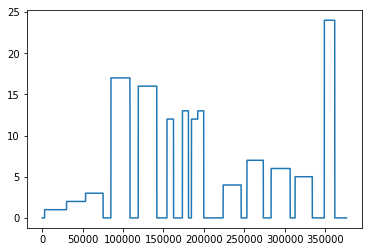

In [66]:
data['activity_ID'].plot()

In [100]:
dataint=data.interpolate(method='linear')

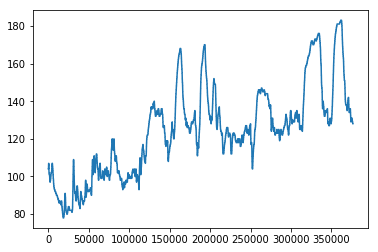

In [101]:
dataint['heart_rate'].plot()

In [107]:
dataa=np.array(dataint)

In [135]:
act_ind,act_count=np.unique(dataa[:,1],return_counts=True)

In [180]:
act_ind=act_ind.astype(int)
act_ind

array([ 0,  1,  2,  3,  4,  5,  6,  7, 12, 13, 16, 17, 24])

In [137]:
act_count

array([126460,  27187,  23480,  21717,  22253,  21265,  23575,  20265,
        15890,  14899,  22941,  23573,  12912], dtype=int64)

In [108]:
data_nz=np.array([x for x in dataa if x[1]!=0])

In [117]:
subind=np.concatenate((np.arange(16),np.arange(13)+20,np.arange(13)+37))

In [142]:
subind

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49])

In [120]:
data2=data_nz[:,subind]

In [127]:
col2=np.array(col_labels)[subind]

In [128]:
col2

array(['time', 'activity_ID', 'heart_rate', 'hand_temp', 'hand_a16_x',
       'hand_a16_y', 'hand_a16_z', 'hand_a6_x', 'hand_a6_y', 'hand_a6_z',
       'hand_gyro_x', 'hand_gyro_y', 'hand_gyro_z', 'hand_B_x',
       'hand_B_y', 'hand_B_z', 'chest_temp', 'chest_a16_x', 'chest_a16_y',
       'chest_a16_z', 'chest_a6_x', 'chest_a6_y', 'chest_a6_z',
       'chest_gyro_x', 'chest_gyro_y', 'chest_gyro_z', 'chest_B_x',
       'chest_B_y', 'chest_B_z', 'ankle_temp', 'ankle_a16_x',
       'ankle_a16_y', 'ankle_a16_z', 'ankle_a6_x', 'ankle_a6_y',
       'ankle_a6_z', 'ankle_gyro_x', 'ankle_gyro_y', 'ankle_gyro_z',
       'ankle_B_x', 'ankle_B_y', 'ankle_B_z'], dtype='<U14')

In [121]:
data2.shape

(249957, 42)

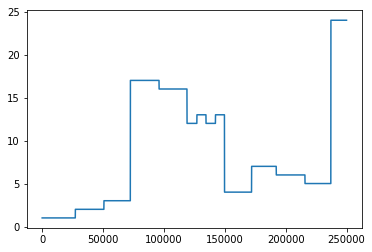

In [125]:
plt.plot(data2[:,1])

In [133]:
data_byact=[]
for i in range(25):
    data_byact.append(np.array([x for x in data2 if x[1]==i]))

In [145]:
col_dict={col_labels[subind[i]]:i for i in range(42)}

In [146]:
col_dict

{'time': 0,
 'activity_ID': 1,
 'heart_rate': 2,
 'hand_temp': 3,
 'hand_a16_x': 4,
 'hand_a16_y': 5,
 'hand_a16_z': 6,
 'hand_a6_x': 7,
 'hand_a6_y': 8,
 'hand_a6_z': 9,
 'hand_gyro_x': 10,
 'hand_gyro_y': 11,
 'hand_gyro_z': 12,
 'hand_B_x': 13,
 'hand_B_y': 14,
 'hand_B_z': 15,
 'chest_temp': 16,
 'chest_a16_x': 17,
 'chest_a16_y': 18,
 'chest_a16_z': 19,
 'chest_a6_x': 20,
 'chest_a6_y': 21,
 'chest_a6_z': 22,
 'chest_gyro_x': 23,
 'chest_gyro_y': 24,
 'chest_gyro_z': 25,
 'chest_B_x': 26,
 'chest_B_y': 27,
 'chest_B_z': 28,
 'ankle_temp': 29,
 'ankle_a16_x': 30,
 'ankle_a16_y': 31,
 'ankle_a16_z': 32,
 'ankle_a6_x': 33,
 'ankle_a6_y': 34,
 'ankle_a6_z': 35,
 'ankle_gyro_x': 36,
 'ankle_gyro_y': 37,
 'ankle_gyro_z': 38,
 'ankle_B_x': 39,
 'ankle_B_y': 40,
 'ankle_B_z': 41}

In [148]:
fourier=np.fft.rfft(data_byact[5][:,col_dict['hand_a16_x']])

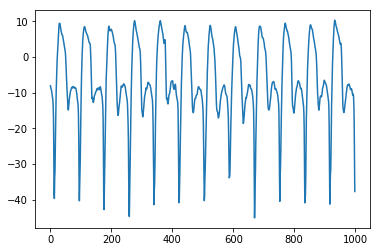

In [164]:
plt.plot(data_byact[5][2000:3000,col_dict['hand_a16_x']])

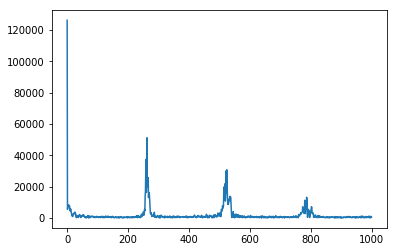

In [155]:
plt.plot(abs(fourier)[:1000])

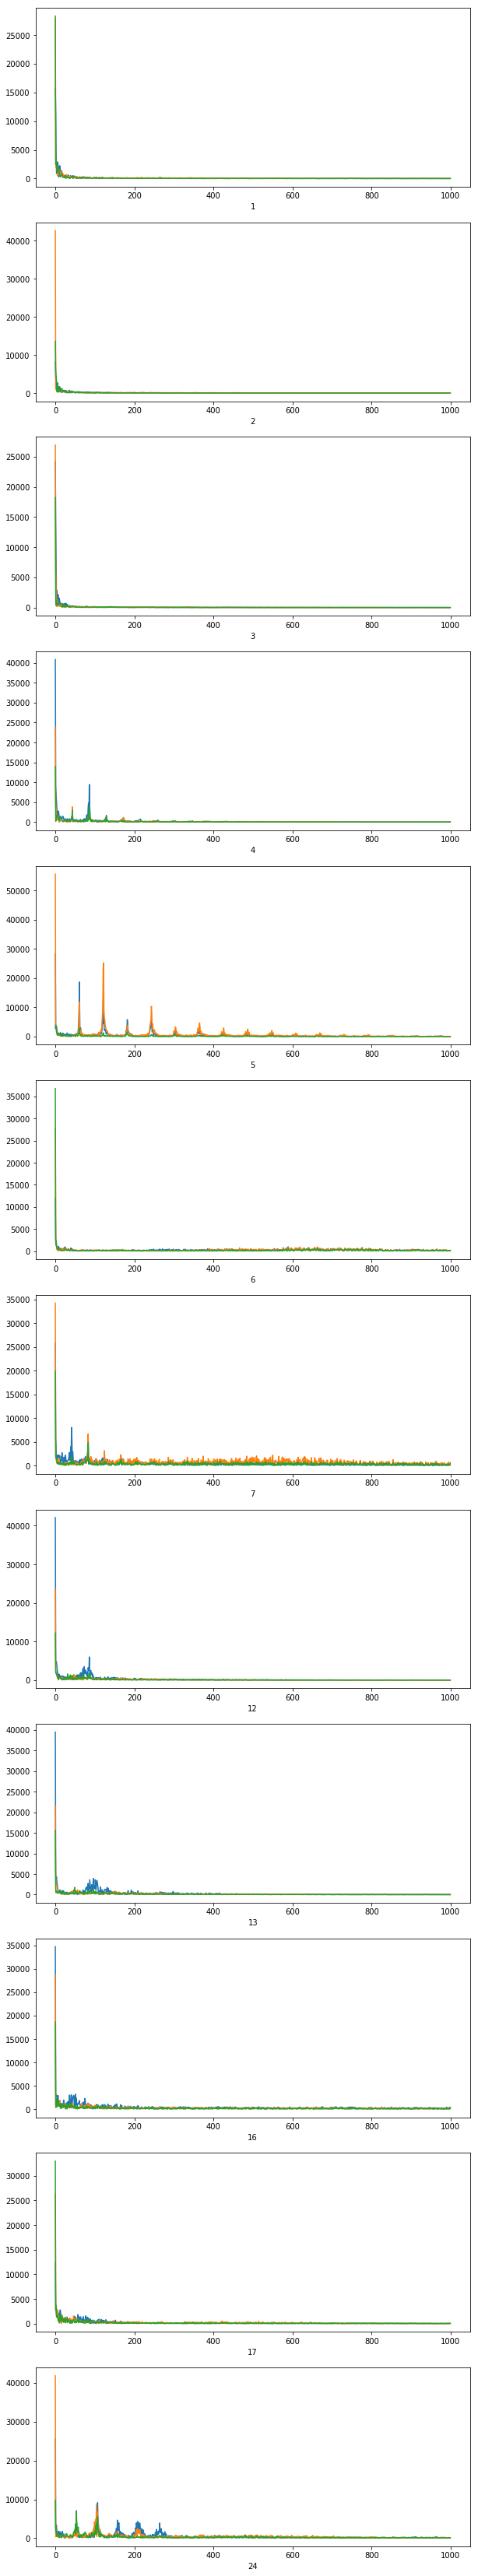

In [184]:
j=0
plt.figure(figsize=(10,60))
for i in act_ind[1:]:
    j+=1
    plt.subplot(len(act_ind)-1, 1, j)
    plt.xlabel(i)
    fourier=np.fft.rfft(data_byact[int(i)][:5000,col_dict['hand_a16_x']])
    plt.plot(abs(fourier)[:1000])
    fourier=np.fft.rfft(data_byact[int(i)][:5000,col_dict['hand_a16_y']])
    plt.plot(abs(fourier)[:1000])
    fourier=np.fft.rfft(data_byact[int(i)][:5000,col_dict['hand_a16_z']])
    plt.plot(abs(fourier)[:1000])

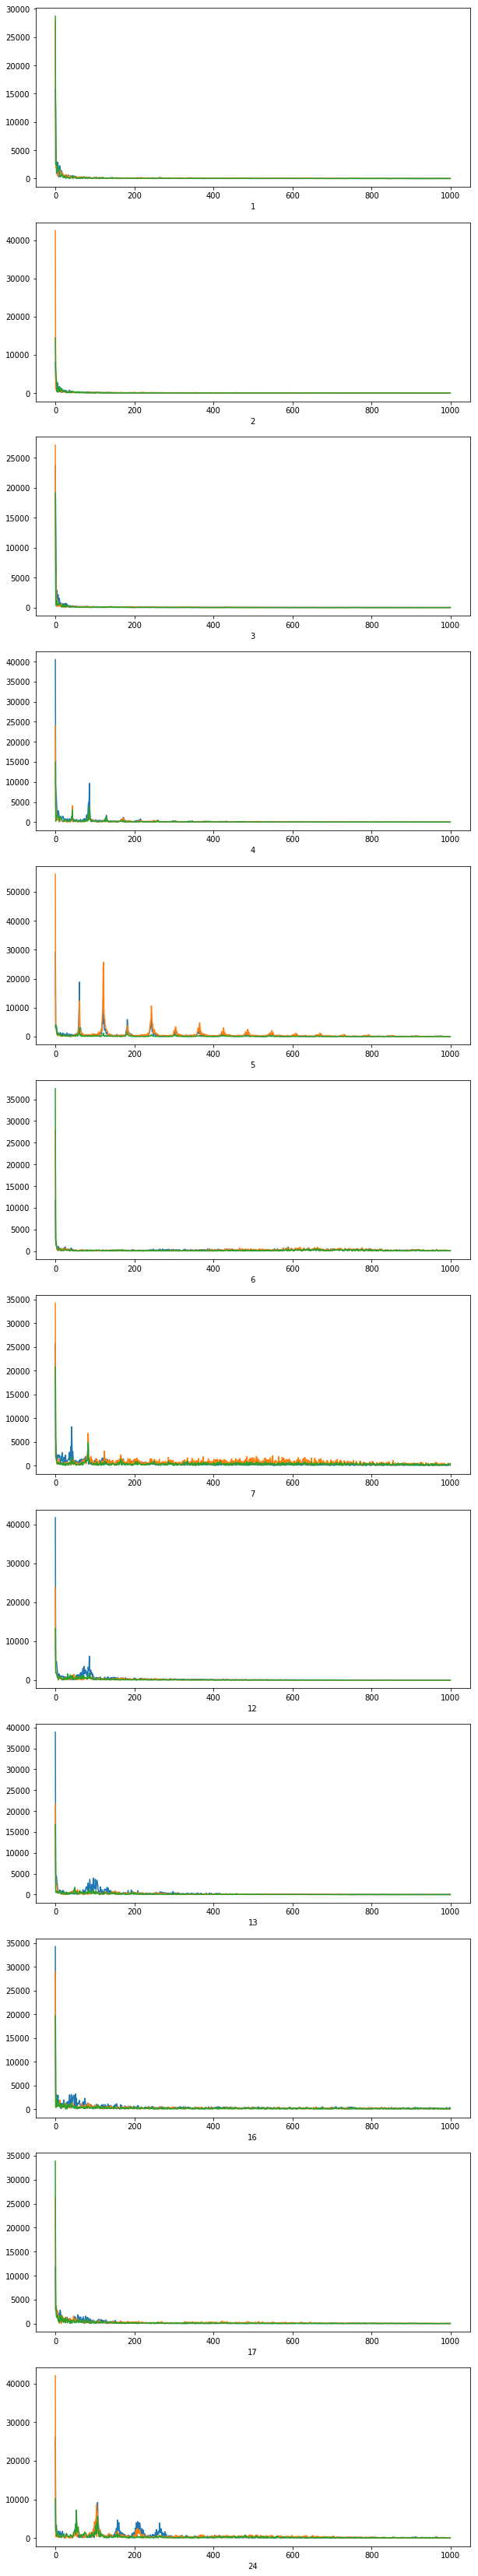

In [185]:
j=0
plt.figure(figsize=(10,60))
for i in act_ind[1:]:
    j+=1
    plt.subplot(len(act_ind)-1, 1, j)
    plt.xlabel(i)
    fourier=np.fft.rfft(data_byact[int(i)][:5000,col_dict['hand_a6_x']])
    plt.plot(abs(fourier)[:1000])
    fourier=np.fft.rfft(data_byact[int(i)][:5000,col_dict['hand_a6_y']])
    plt.plot(abs(fourier)[:1000])
    fourier=np.fft.rfft(data_byact[int(i)][:5000,col_dict['hand_a6_z']])
    plt.plot(abs(fourier)[:1000])

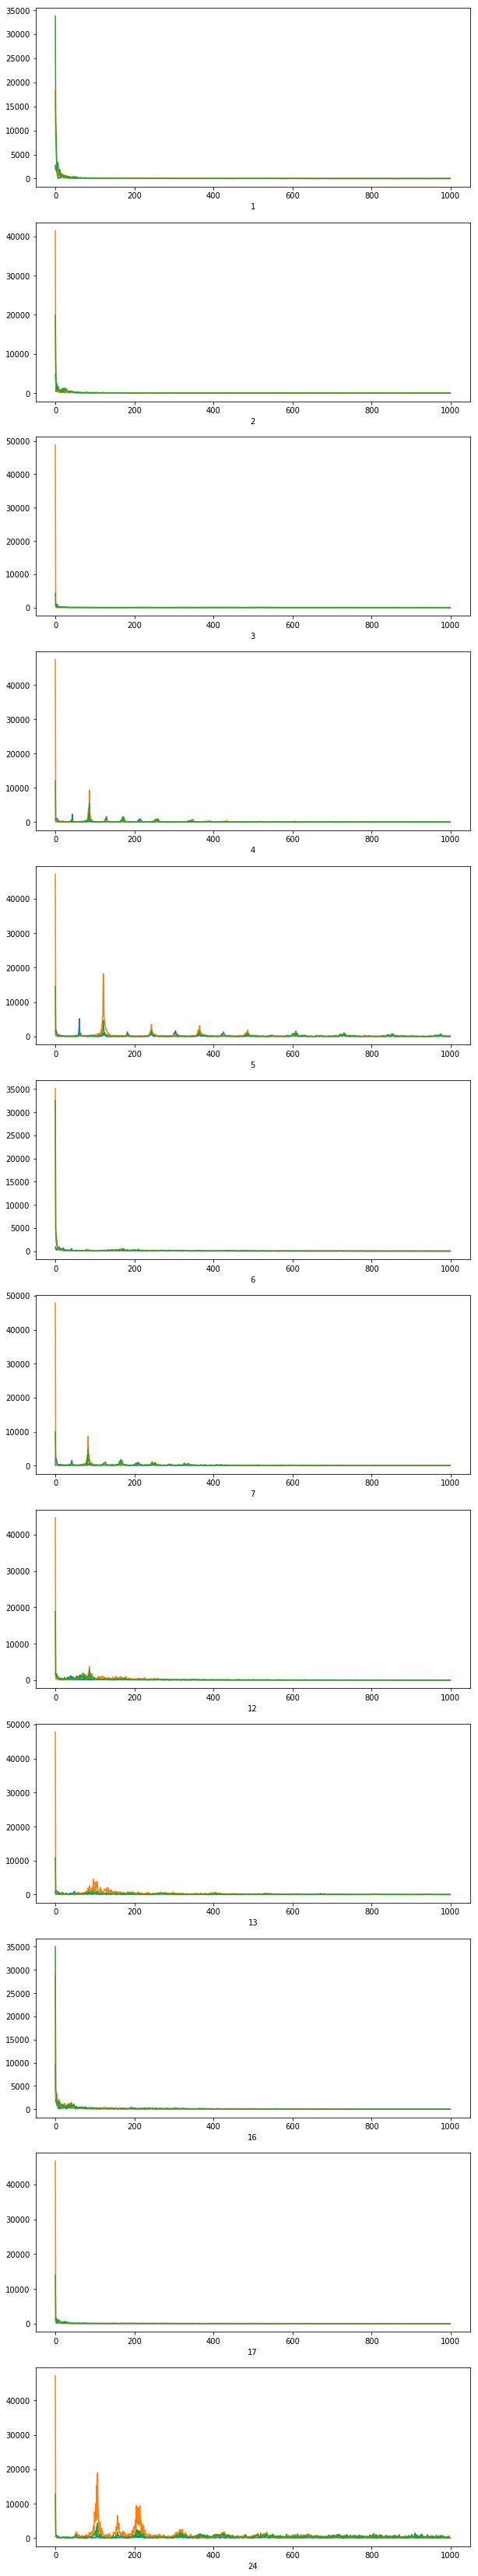

In [186]:
j=0
plt.figure(figsize=(10,60))
for i in act_ind[1:]:
    j+=1
    plt.subplot(len(act_ind)-1, 1, j)
    plt.xlabel(i)
    fourier=np.fft.rfft(data_byact[int(i)][:5000,col_dict['chest_a6_x']])
    plt.plot(abs(fourier)[:1000])
    fourier=np.fft.rfft(data_byact[int(i)][:5000,col_dict['chest_a6_y']])
    plt.plot(abs(fourier)[:1000])
    fourier=np.fft.rfft(data_byact[int(i)][:5000,col_dict['chest_a6_z']])
    plt.plot(abs(fourier)[:1000])

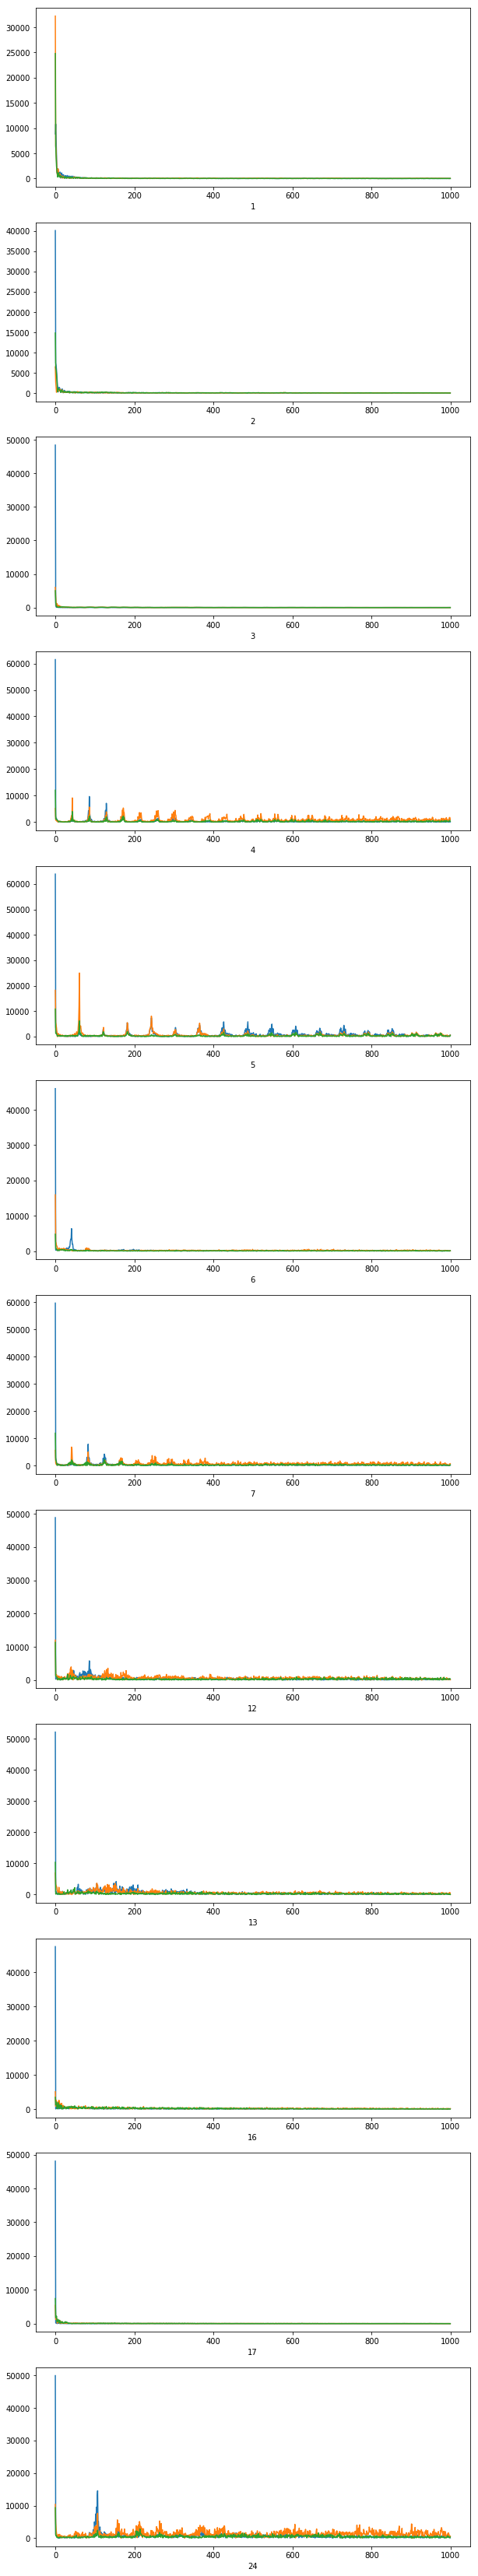

In [187]:
j=0
plt.figure(figsize=(10,60))
for i in act_ind[1:]:
    j+=1
    plt.subplot(len(act_ind)-1, 1, j)
    plt.xlabel(i)
    fourier=np.fft.rfft(data_byact[int(i)][:5000,col_dict['ankle_a16_x']])
    plt.plot(abs(fourier)[:1000])
    fourier=np.fft.rfft(data_byact[int(i)][:5000,col_dict['ankle_a16_y']])
    plt.plot(abs(fourier)[:1000])
    fourier=np.fft.rfft(data_byact[int(i)][:5000,col_dict['ankle_a16_z']])
    plt.plot(abs(fourier)[:1000])

In [188]:
import seaborn as sns

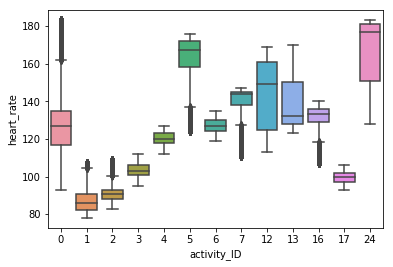

In [191]:
sns.boxplot(x="activity_ID", y="heart_rate", data=dataint)